<a id="toc"></a>

# <u>Table of Contents</u>

1.) [Imports](#imports)  
2) [Pollutants](#pollutants)  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1.) [Missing values](#poll_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.2.) [General location](#poll_gen_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.3.) [Specific location](#poll_spec_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.4.) [Matrix](#poll_matrix)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.5.) [Method](#poll_method)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.6.) [Study Name](#poll_study)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.7.) [Parameter](#poll_param)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.) [NST Site](#poll_nst_site)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.9.) [Fiscal Year ](#fiscal)   
3.) [Sites](#sites)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1.) [Missing values](#site_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.2.) [Study Name](#sites_study_name)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.3.) [Source File](#site_source_file)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.4.) [NST Site](#site_nst)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.5.) [General Location](#site_gen_loc)   
4.) [Histopaths](#histopaths)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1.) [Data Processsing](#hist_process)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.2.) [Quick Overview](#hist_overview)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.3.) [Missing values](#hist_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.) [General features](#hist_gen_feats)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.5.) [Location](#hist_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.6.) [NST Site](#hist_nst_site)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.7.) [Gonadal](#hist_gonadal)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.8.) [Dermo](#hist_dermo)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.9.) [Correlation plot](#hist_corr)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.10.) [Volume](#hist_vol)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.11.) [Size](#hist_size)   

---
<a id="imports"></a>

# [^](#toc)<u>Imports</u>

In [1]:
### Standard imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

### Standard plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Progress bar
from tqdm import tqdm

### Fancy plot of Earth (This library is really cool and fast!)
import folium
from folium.plugins import MarkerCluster

### Advanced plotting import
import altair as alt
alt.renderers.enable('notebook')

# Helps visualize wordy features
from wordcloud import WordCloud

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = "../../data/mussel/"

### Styling helpers

In [2]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a id="pollutants"></a>

# [^](#toc) <u>Pollutants</u>

In [3]:
pollutants = pd.read_csv(DATA_PATH + "pollutants.csv")
print("Shape of pollutants data:", pollutants.shape)

num_cols = [col for col in pollutants.columns if pollutants[col].dtype != object]
cat_cols = [col for col in pollutants.columns if pollutants[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

pollutants.head()

Shape of pollutants data: (769926, 22)

Numeric columns:
fiscal_year --- latitude --- longitude --- result

Categoric columns:
coastal_ecological_area --- collection_date --- general_location --- matrix --- method --- nst_sample_id --- nst_site --- parameter --- parameter_name --- qualifier --- region_name --- scientific_name --- source_file --- specific_location --- state_name --- stratum --- study_name --- units


coastal_ecological_area         collection_date  fiscal_year  \
0                     NaN  18AUG2015:00:00:00.000       2015.0   
1                     NaN  18AUG2015:00:00:00.000       2015.0   
2                     NaN  18AUG2015:00:00:00.000       2015.0   
3                     NaN  18AUG2015:00:00:00.000       2015.0   
4                     NaN  18AUG2015:00:00:00.000       2015.0   

  general_location  latitude  longitude    matrix       method  \
0      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
1      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
2      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
3      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
4      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   

          nst_sample_id    nst_site                   parameter  \
0  BA2015AKC-15-005bSED  AKC_15-005  1,6,7-Trimethylnaphthalene   
1  BA2015AKC-15-005bSED  AKC_15-005    1-Methyldibenzothiophene   
2  BA2015AKC-15-005bSED  AKC_15-005            1-Methylfluorene   
3  BA2015AKC-15-005bSED  AKC_15-005         1-Methylnaphthalene   
4  BA2015AKC-15-005bSED  AKC_15-005        1-Methylphenanthrene   

  parameter_name      qualifier region_name  result scientific_name  \
0            NaN  Below the MDL         NaN   0.104        Sediment   
1            NaN  Below the MDL         NaN   0.038        Sediment   
2            NaN            NaN         NaN   0.447        Sediment   
3            NaN            NaN         NaN   0.595        Sediment   
4            NaN            NaN         NaN   0.460        Sediment   

                               source_file specific_location state_name  \
0  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
1  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
2  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
3  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
4  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   

  stratum           study_name     units  
0     NaN  Alaska Arctic Study  ng/dry g  
1     NaN  Alaska Arctic Study  ng/dry g  
2     NaN  Alaska Arctic Study  ng/dry g  
3     NaN  Alaska Arctic Study  ng/dry g  
4     NaN  Alaska Arctic Study  ng/dry g

<a id="poll_nan"></a>

### [^](#toc) Missing values

In [144]:
missing_cols = pollutants.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

temp = pd.DataFrame(pollutants[missing_cols].isnull().sum()).reset_index()
temp.columns = ["Feature", "Number Missing"]

temp

Feature  Number Missing
0   coastal_ecological_area          769562
1           collection_date           94935
2               fiscal_year             364
3          general_location               3
4                  latitude          769562
5                 longitude          769562
6                    matrix             364
7                    method            6654
8             nst_sample_id             364
9                 parameter            1100
10           parameter_name          769190
11                qualifier          447502
12              region_name          769562
13                   result             364
14          scientific_name             364
15        specific_location               3
16               state_name          769562
17                  stratum          769592
18                    units             364

### Missing values in location (general and specific)

Nice general and specifica are missing from the same rows.  I can probably delete these two rows since they don't seem to contain any information

In [6]:
pollutants[(pollutants.general_location.isnull()) | (pollutants.specific_location.isnull())]

coastal_ecological_area collection_date  fiscal_year  \
7761  Alaska South Central - Cook Inlet             NaN          NaN   
7780  Alaska South Central - Cook Inlet             NaN          NaN   
7790  Alaska South Central - Cook Inlet             NaN          NaN   

     general_location  latitude  longitude matrix method nst_sample_id  \
7761              NaN  59.20715 -151.81512    NaN    NaN           NaN   
7780              NaN  59.46741 -151.53439    NaN    NaN           NaN   
7790              NaN  59.42355 -151.31118    NaN    NaN           NaN   

      nst_site  ...  qualifier region_name result scientific_name  \
7761      CICB  ...        NaN      Alaska    NaN             NaN   
7780  KB2_KJ-2  ...        NaN      Alaska    NaN             NaN   
7790      KBTB  ...        NaN      Alaska    NaN             NaN   

                              source_file specific_location state_name  \
7761  Sites_KachemakBayBioeffects2009.csv               NaN     Alaska   
7780  Sites_KachemakBayBioeffects2009.csv               NaN     Alaska   
7790  Sites_KachemakBayBioeffects2009.csv               NaN     Alaska   

     stratum               study_name units  
7761     NaN  Kachemak Bay Bioeffects   NaN  
7780     NaN  Kachemak Bay Bioeffects   NaN  
7790     NaN  Kachemak Bay Bioeffects   NaN  

[3 rows x 22 columns]

### Distribution of pollutants

In [9]:
locations = list(pollutants[pollutants.latitude.notnull()].specific_location.value_counts().index)

print("Num lat missing", pollutants.latitude.isnull().sum())
for location in tqdm(locations):
    (pollutants.where(pollutants.specific_location == location).latitude ==
     pollutants[pollutants.specific_location == location].latitude.mean())

print("Num lat missing", pollutants.latitude.isnull().sum())

  0%|          | 0/345 [00:00<?, ?it/s]

Num lat missing 769562


100%|██████████| 345/345 [02:36<00:00,  2.21it/s]

Num lat missing 769562


In [173]:
pollutants.general_location.value_counts()

pollutants.latitude.fillna(pollutants[])

San Diego Bay                       31103
San Francisco Bay                   30771
Tampa Bay                           19549
Galveston Bay                       16392
Matagorda Bay                       11814
Lake Erie                           11649
St. Thomas East End Reserve         10704
Lake Michigan                       10578
Port Valdez                         10556
Choctawhatchee Bay                   9796
Mississippi Sound                    9189
Prince William Sound                 8628
Bristol Bay                          8580
Guanica Bay                          7866
Mobile Bay                           7730
San Pedro Bay                        7446
Lower Laguna Madre                   7014
Pensacola Bay                        7006
Barataria Bay                        6852
St Lucie - Lower Estuary             6692
Apalachicola Bay                     6572
Breton Sound                         6192
Gulf of Alaska                       6051
Lake Ontario                      

In [168]:
locations = [("Alaska, US", [59.7, -152.5]), ("Washington, US", [48.2, -123])]

# Zoom in on which location
location  = locations[1]

In [169]:
m = folium.Map(location=location[1], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m)

for key, group in pollutants.groupby("coastal_ecological_area"):
    for lat, lon, nst_site in group[["latitude", "longitude", "nst_site"]].values:    
        folium.Marker(
            location=[lat, lon],
            popup="{} - {}".format(nst_site, key),
            icon=folium.Icon(color='green', icon='ok-sign'),
        ).add_to(marker_cluster)
        
m

### Method

### Fill in location missing values

(Check if they are the same rows that have missing names)

In [7]:
cols = ["general_location", "specific_location"]
pollutants[cols] = pollutants[cols].fillna("Location unknown")

<a id="poll_gen_loc"></a>

### [^](#toc) General location

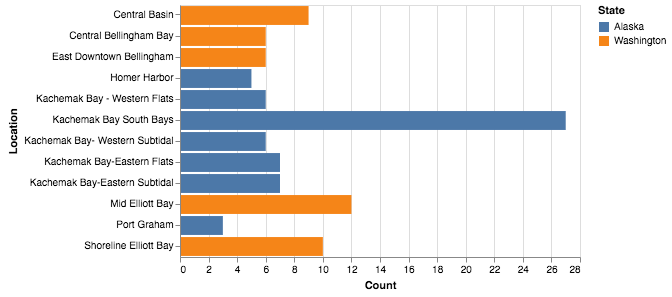

In [128]:
temp = (pollutants
        .groupby("state_name")
        .general_location
        .value_counts()
        .head(12)
        .rename(columns={"general_location": "Count"}))
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["State", "Location", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Location',
    color="State"
)

<a id="poll_spec_loc"></a>

### [^](#toc) Specific location

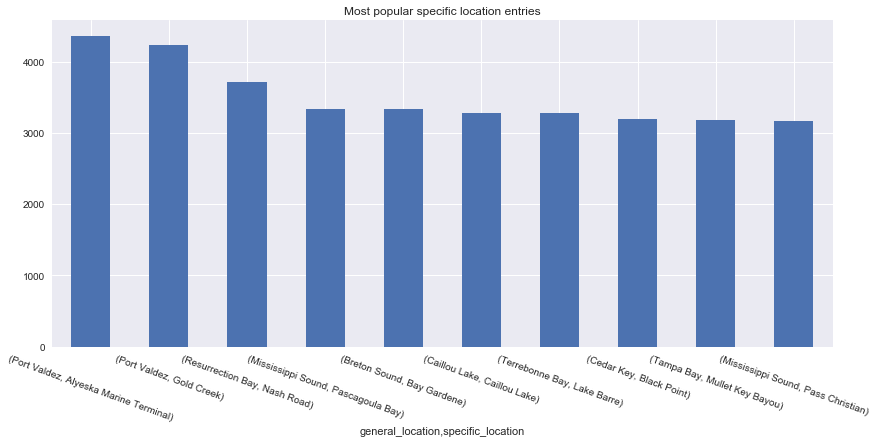

In [9]:
plt.figure(figsize=(14, 6))
temp = pollutants.groupby(["general_location", "specific_location"])["specific_location"].count().sort_values(ascending=False).head(10)
_ = temp.plot(kind="bar", title="Most popular specific location entries", rot=-20)

<a id="poll_matrix"></a>

### [^](#toc) Matrix

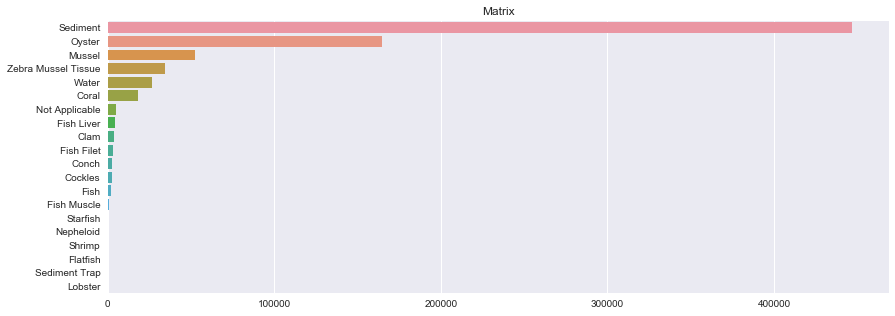

In [10]:
plt.figure(figsize=(14, 5))
temp = pollutants.matrix.value_counts()
_ = sns.barplot(temp.values, temp.index).set(title="Matrix")

<a id="poll_method"></a>

### [^](#toc) Method

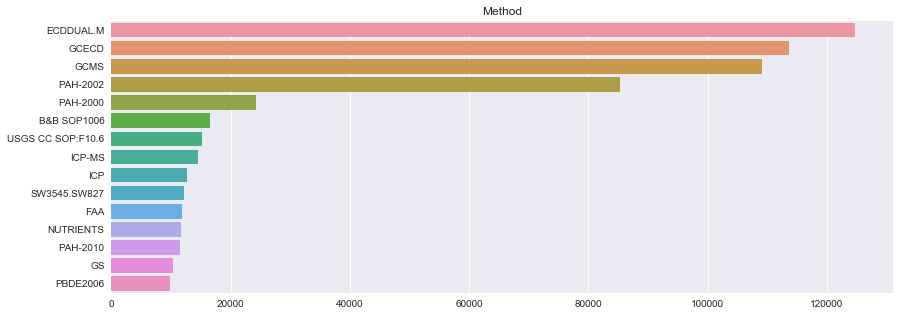

In [11]:
plt.figure(figsize=(14, 5))
temp = pollutants.method.value_counts().head(15)
_ = sns.barplot(temp.values, temp.index).set(title="Method")

<a id="poll_study"></a>

### [^](#toc) Study Name

"The study for which the given record was collected. "

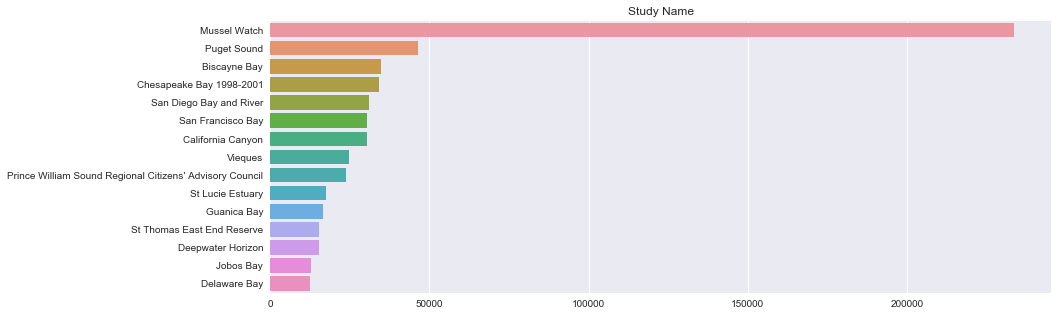

In [12]:
plt.figure(figsize=(14, 5))
temp = pollutants.study_name.value_counts().head(15)
_ = sns.barplot(temp.values, temp.index).set(title="Study Name")

<a id="poll_param"></a>

### [^](#toc) Parameter

parameter_name does not seem to have much useful information, partly giving information already expressed here

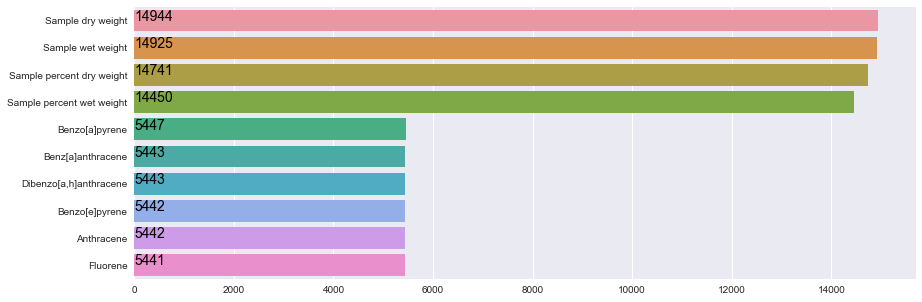

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
temp = pollutants.parameter.value_counts().head(10)
pretty_bar(temp, ax)

<a id="poll_nst_site"></a>

### [^](#toc) NST Site

"A character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location."

There are 3939 unique values


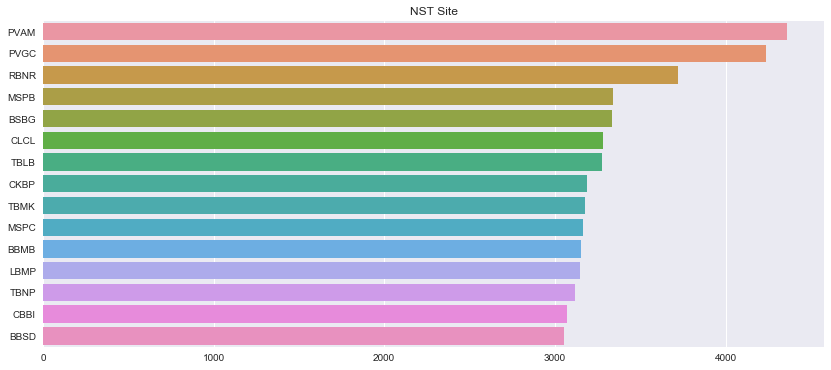

In [19]:
plt.figure(figsize=(14, 6))
temp = pollutants.nst_site.value_counts()
print("There are {}{}{} unique values".format(color.BOLD, len(temp), color.END))
_ = sns.barplot(temp.head(15).values, temp.head(15).index).set(title="NST Site")

<a id="fiscal"></a>

### [^](#toc) Fiscal Year 

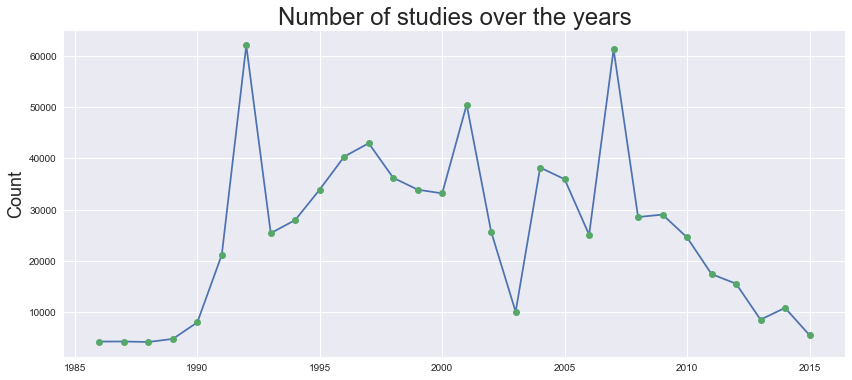

In [52]:
plt.figure(figsize=(14, 6))
plt.title("Number of studies over the years", fontsize=24)
plt.ylabel("Count", fontsize=18)

temp = pollutants.fiscal_year.value_counts().sort_index()
plt.plot(temp.index, temp.values)
plt.plot(temp.index, temp.values, ".", markersize=14);

### Qualifier

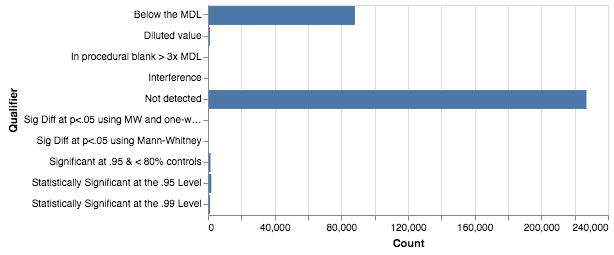

In [158]:
temp = (pollutants
        .qualifier
        .value_counts())
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["Qualifier", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Qualifier',
)

<a id="poll_result"></a>

### [^](#toc) Result

Before we can exlpore the result we should look at the units its in.

Here's a description of each of them below...

    
    L: Liters
    Percent: 
    Phi: I guess they're making an angle measurement here

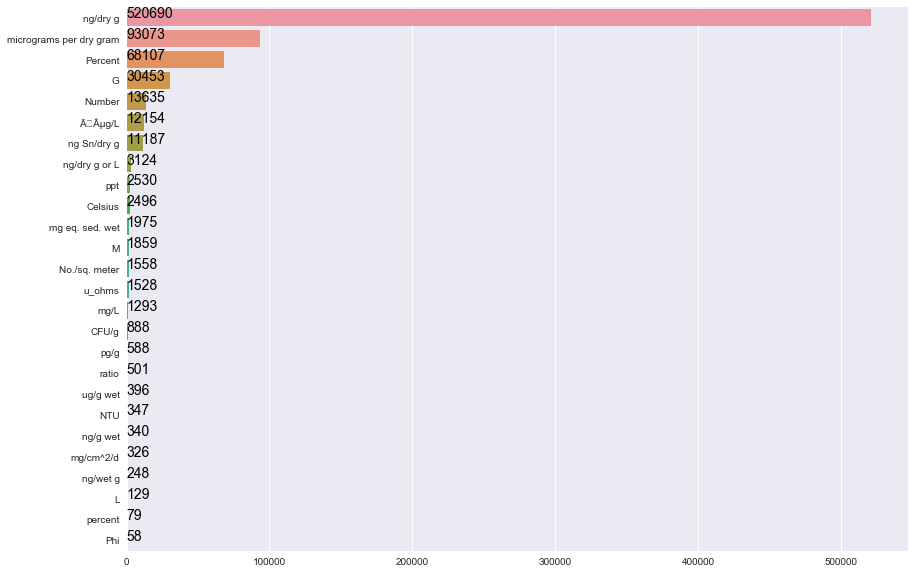

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
pretty_bar(pollutants.units.value_counts(), ax)

<a name="sites"></a>

# [^](#toc) <u>Sites</u>

A lot of these columns we've seen in the pollants data

In [143]:
sites = pd.read_csv(DATA_PATH + "sites.csv")
print("Shape of site data: {}{}{}".format(color.BOLD, sites.shape, color.END))

# This feature has a lot of missing values and isn't explained
sites.drop("reg_nm", axis=1, inplace=True)

num_cols = [col for col in sites.columns if sites[col].dtype != object]
cat_cols = [col for col in sites.columns if sites[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

sites.head()

Shape of site data: (4107, 12)

Numeric columns:
latitude --- longitude

Categoric columns:
coastal_ecological_area --- general_location --- nst_site --- region_name --- source_file --- specific_location --- state_name --- stratum --- study_name


coastal_ecological_area general_location  latitude  longitude    nst_site  \
0            Alaskan West      Chukchi Sea   69.8383  -163.8096  AKC10-0001   
1            Alaskan West      Chukchi Sea   69.4069  -165.4180  AKC10-0002   
2            Alaskan West      Chukchi Sea   69.1504  -164.8480  AKC10-0003   
3            Alaskan West      Chukchi Sea   68.9944  -167.3424  AKC10-0004   
4            Alaskan West      Chukchi Sea   69.6116  -163.7207  AKC10-0005   

  region_name                  source_file specific_location state_name  \
0         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
1         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
2         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
3         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
4         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   

  stratum           study_name  
0     NaN  Alaska Arctic Study  
1     NaN  Alaska Arctic Study  
2     NaN  Alaska Arctic Study  
3     NaN  Alaska Arctic Study  
4     NaN  Alaska Arctic Study

<a id="site_nan"></a>

### [^](#toc) Missing data

In [127]:
missing_cols = sites.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

temp = pd.DataFrame(sites[missing_cols].isnull().sum()).reset_index()
temp.columns = ["Feature", "Amount missing"]

temp

Feature  Amount missing
0   general_location              37
1             reg_nm            3932
2        region_name             175
3  specific_location              95
4            stratum            2244

### stratum

Some studies were split into stratified random samples in order to ensure that each subpopulation was sampled appropriately.

Where available, this field defines the stratum for a given location.

In [ ]:
# sites.stratum.value_counts()

<a id="sites_study_name"></a>

### [^](#toc) Study Name

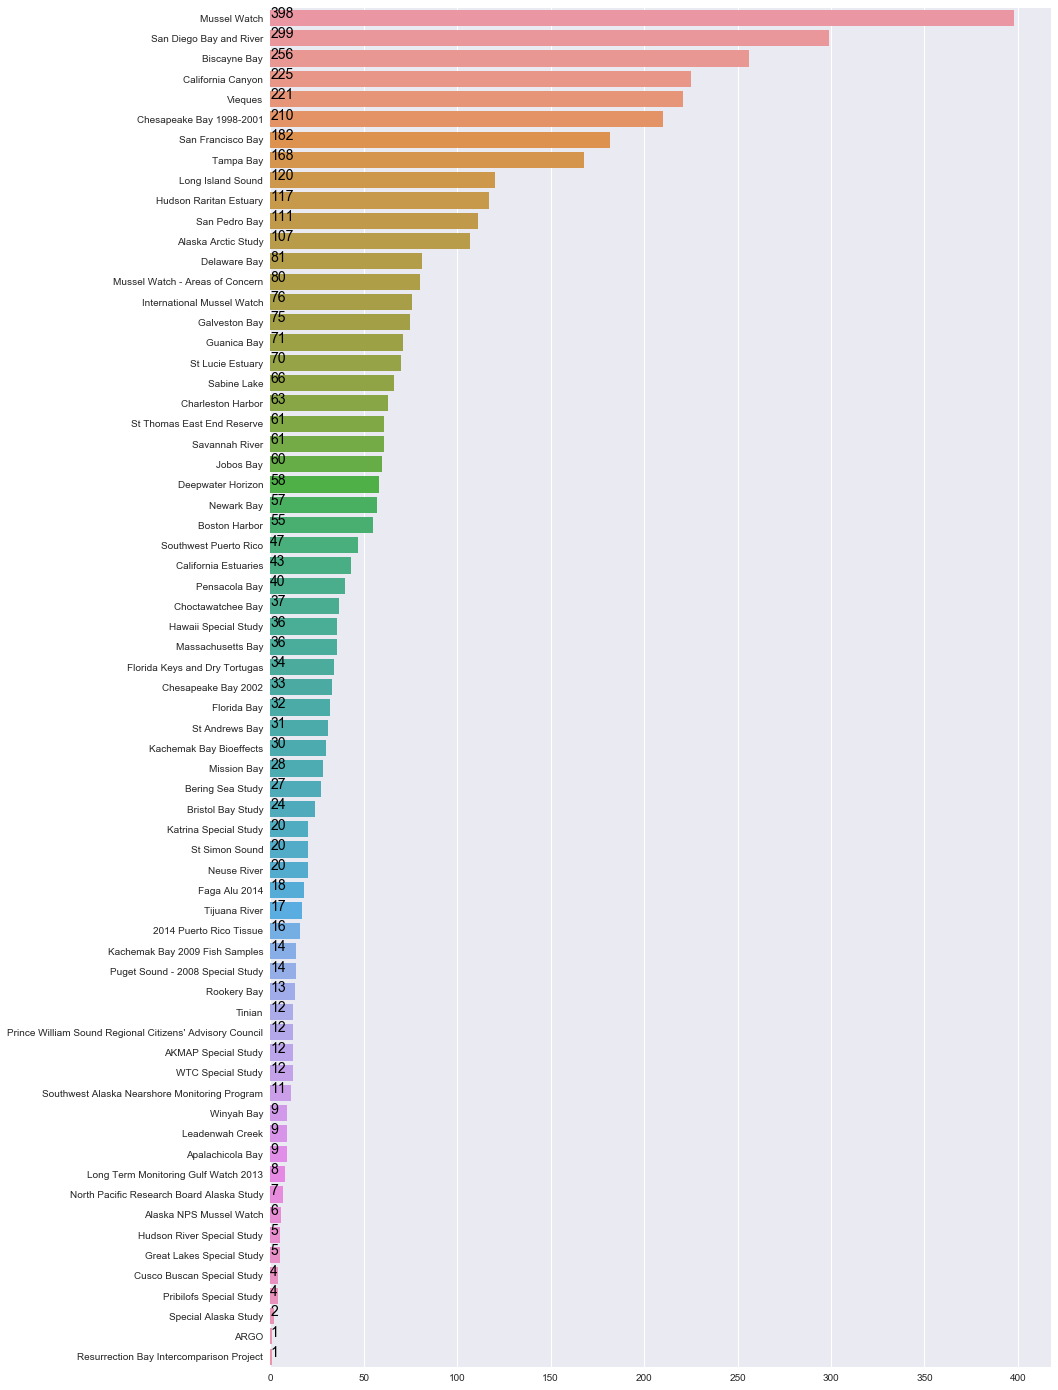

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(14, 25))
temp = sites.study_name.value_counts()
pretty_bar(temp, ax)

<a id="site_source_file"></a>

### [^](#toc) Source File

FIXME: a lot of information can be gotten from the file names.  There should be a regex to make the file names more human readable (camel case --> normal format)

In [ ]:
# sites.source_file.map(lambda x.value_counts()

### Location

coastal_ecological_area, general_location, region_name, specific_location

<a id="site_nst"></a>

### [^](#toc) NST Site

NOTE: only 1/4 of the sites are shown.  This plot is graphics heavy and is exceding the data limit of markers

In [25]:
# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in sites[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

<a id="site_gen_loc"></a>

### [^](#toc) General Location

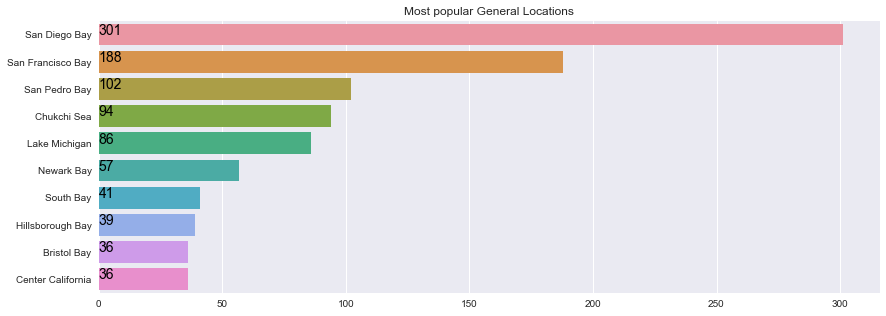

In [5]:
temp = (sites
        .groupby("state_name")
        .general_location
        .value_counts()
        .head(12)
        .rename(columns={"general_location": "Count"}))
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["State", "Location", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Location',
    color="State"
)

---
<a name="histopaths"></a>

# [^](#toc) <u>Histopaths</u>

There appears to be a lot of columns so let's figure out the important ones

In [123]:
histopaths = pd.read_csv(DATA_PATH + "histopaths.csv")
print("Shape of histopaths data: {}{}{}".format(color.BOLD, histopaths.shape, color.END))

Shape of histopaths data: (1800, 79)


<a id="hist_process"></a>

### [^](#toc) Data Processsing

Interestingly, there are several columns that are completely empty!  These features are: 

#### Missing 100% of values

    edema
    gonad_subsample_wet_weight
    hydra_gill
    nemertine_gill
    other_trematode_sporocyst_gill
    other_trematode_sporocyst_gut
    tumor

Let's delete them from the dataset since they carry no information.  In addition there are also many columns that only have 10 entries present!  I've looked through each of those entries and deemed these features worthy of being dropped as well (most of them have only a single unique entry).  These features are:

#### Missing 1790 values out of 1800

    abnormality
    abnormality_description
    chlamydia
    metacercaria
    pseudoklossia
    rickettsia_digestive_tubule
    rickettsia_gut
    
In addition, there are some columns that are boring and contain only one unique value.  These should be removed as well
    
#### Boring features

    ciliate_large_gill
    multinucleated_sphere_x
    pea_crab
    proctoeces
    neoplasm 
    unusual_digestive_tubule
    unidentified_gonoduct_organism
    station_letter
    multinucleated_sphere_x_description
    
Finally, there are some features that are lacking any identifying information (what does the feature mean, values stand for)
    
#### Columns lacking information

    unidentified_organism

In [32]:
### Missing 100% of values
cols = ["edema", "gonad_subsample_wet_weight", "hydra_gill",
        "nemertine_gill", "other_trematode_sporocyst_gill",
        "other_trematode_sporocyst_gut", "tumor"]

### Missing 1790 values out of 1800
cols.extend(["abnormality", "abnormality_description", "chlamydia", 
        "metacercaria", "pseudoklossia", 
        "rickettsia_digestive_tubule", "rickettsia_gut"])

### Boring features
cols.extend(["ciliate_large_gill", "multinucleated_sphere_x",
             "pea_crab", "proctoeces", "neoplasm",
             "unusual_digestive_tubule", "unidentified_gonoduct_organism",
             "station_letter", "multinucleated_sphere_x_description"])

histopaths = histopaths.drop(cols, axis=1)

<a id="hist_overview"></a>

### [^](#toc) Quick Overview

In [32]:
num_cols = [col for col in histopaths.columns if histopaths[col].dtype != object]
cat_cols = [col for col in histopaths.columns if histopaths[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

histopaths.head()


Numeric columns:
bucephalus --- ceroid --- cestode_body --- cestode_gill --- cestode_mantle --- ciliate_digestive_tract --- ciliate_gut --- ciliate_small_gill --- condition_code --- copepod_body --- copepod_gill --- copepod_gut_digestive_tubule --- dermo_numerical_value --- diffuse_inflammation --- diffuse_necrosis --- digestive_tubule_atrophy --- empty_displacement_volume --- fiscal_year --- focal_inflammation --- focal_necrosis --- full_displacement_volume --- latitude --- length --- longitude --- nematode --- nematopsis_body --- nematopsis_gill --- nematopsis_mantle --- protozoan_digestive_tubule --- protozoan_gut --- sample_number --- trematode_metacercariae --- unidentified_organism --- wet_weight --- xenoma

Categoric columns:
coastal_ecological_area --- condition_code_description --- dermo --- dermo_description --- dermo_infection_intensity --- digestive_tubule_atrophy_description --- general_location --- gonadal_index --- gonadal_index_description --- multinucleated_sphere_x_d

<a id="hist_nan"></a>

### [^](#toc) Missing values

In [34]:
missing_cols = histopaths.isnull().sum()
missing_cols = histopaths[missing_cols[missing_cols > 0].index].isnull().sum()
missing_cols = missing_cols.reset_index()
missing_cols.columns = ["Column", "Num missing"]

missing_cols

Column  Num missing
0                             bucephalus         1382
1                                 ceroid          467
2                           cestode_body         1392
3                           cestode_gill         1392
4                         cestode_mantle         1392
5                ciliate_digestive_tract         1382
6                            ciliate_gut         1382
7                     ciliate_small_gill         1382
8                         condition_code          925
9             condition_code_description          925
10                          copepod_body         1382
11                          copepod_gill         1382
12          copepod_gut_digestive_tubule         1382
13                                 dermo          925
14                     dermo_description          925
15             dermo_infection_intensity          925
16                 dermo_numerical_value          925
17                  diffuse_inflammation          467
18                      diffuse_necrosis          467
19              digestive_tubule_atrophy          467
20  digestive_tubule_atrophy_description          467
21             empty_displacement_volume          925
22                    focal_inflammation         1382
23                        focal_necrosis          467
24              full_displacement_volume          925
25                         gonadal_index          467
26   multinucleated_sphere_x_description         1392
27                              nematode          477
28                       nematopsis_body         1385
29                       nematopsis_gill         1384
30                     nematopsis_mantle         1382
31            protozoan_digestive_tubule         1392
32                         protozoan_gut         1392
33                         sample_letter          885
34                          species_name          885
35                        station_letter          925
36               trematode_metacercariae          467
37   trematode_metacercariae_description          468
38                 unidentified_organism          467
39                            wet_weight          320
40                                xenoma         1382

<a id="hist_gen_feats"></a>

### [^](#toc) General features

FIXME: take out dermo from here and put year

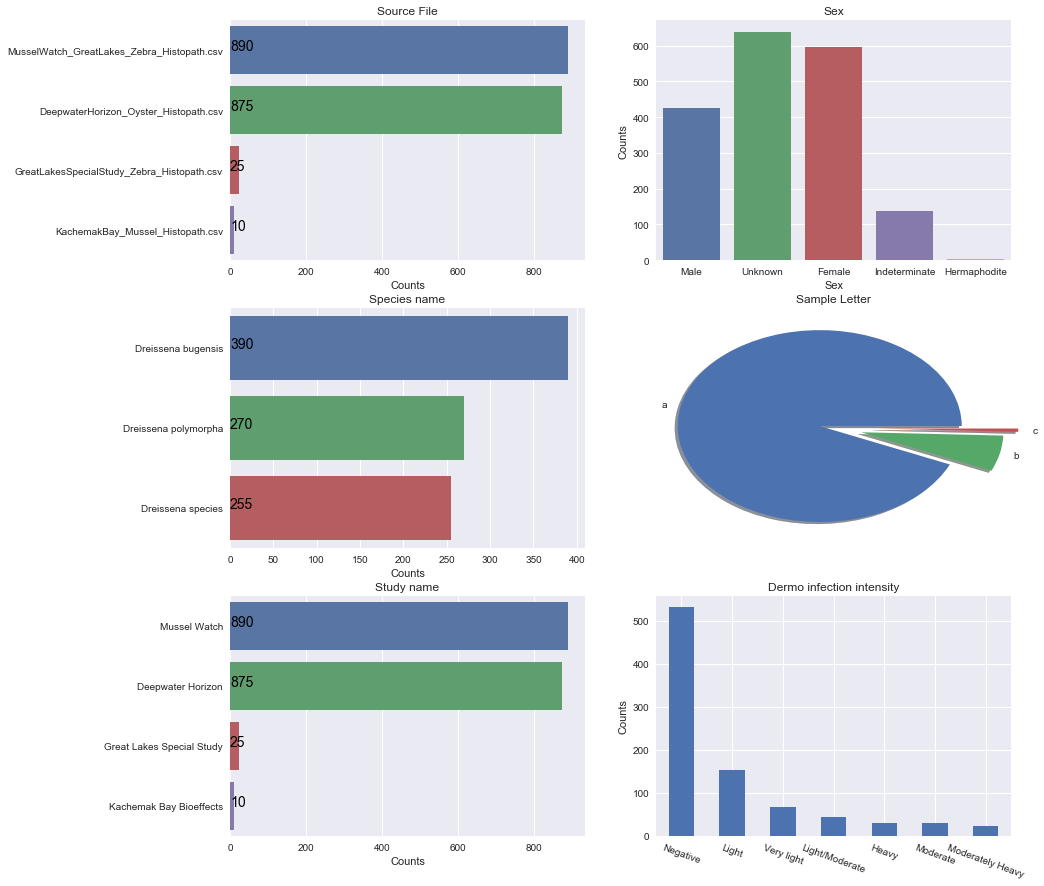

In [64]:
fig, axarr = plt.subplots(3, 2, figsize=(14, 15))

### source_file
pretty_bar(histopaths.source_file.value_counts(), axarr[0][0],
           title="Source File", xlabel="Counts")

### sex
sns.countplot(histopaths.sex, ax=axarr[0][1]).set(title="Sex", xlabel="Sex", ylabel="Counts")

### species_name
pretty_bar(histopaths.species_name.value_counts(), axarr[1][0],
           title="Species name", xlabel="Counts")

### sample_letter
explode = [0.1, 0.2, 0.3]
(histopaths.sample_letter
     .value_counts()
     .plot(kind="pie", ax=axarr[1][1], explode=explode, shadow=True)
     .set(ylabel="", title="Sample Letter"))

### study_name
pretty_bar(histopaths.study_name.value_counts(), axarr[2][0],
           title="Study name", xlabel="Counts")

### dermo_infection_intensity
(histopaths.dermo_infection_intensity
     .value_counts()
     .plot(kind="bar", ax=axarr[2][1], rot=-20)
     .set(title="Dermo infection intensity", ylabel="Counts"));

<a id="hist_loc"></a>

### [^](#toc) Location

#### Location Wordcloud

FIXME: This seems to be two words.  I want one word

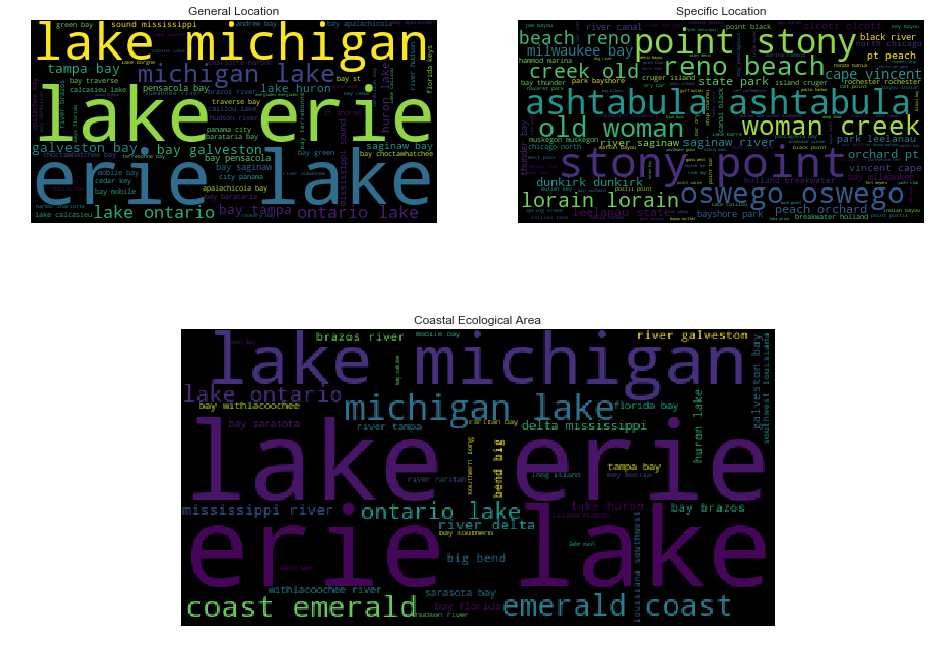

In [86]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

for ax, col, title in [(ax1, "general_location",        "General Location"),
                       (ax2, "specific_location",       "Specific Location"),
                       (ax3, "coastal_ecological_area", "Coastal Ecological Area")]:
    histopaths[col].fillna("", inplace=True)
    text = " ".join(histopaths[col]).lower()
    wc = WordCloud(max_words=1200).generate(text)
    ax.imshow(wc)
    ax.axis('off')
    ax.set_title(title)

#### Most popular regions

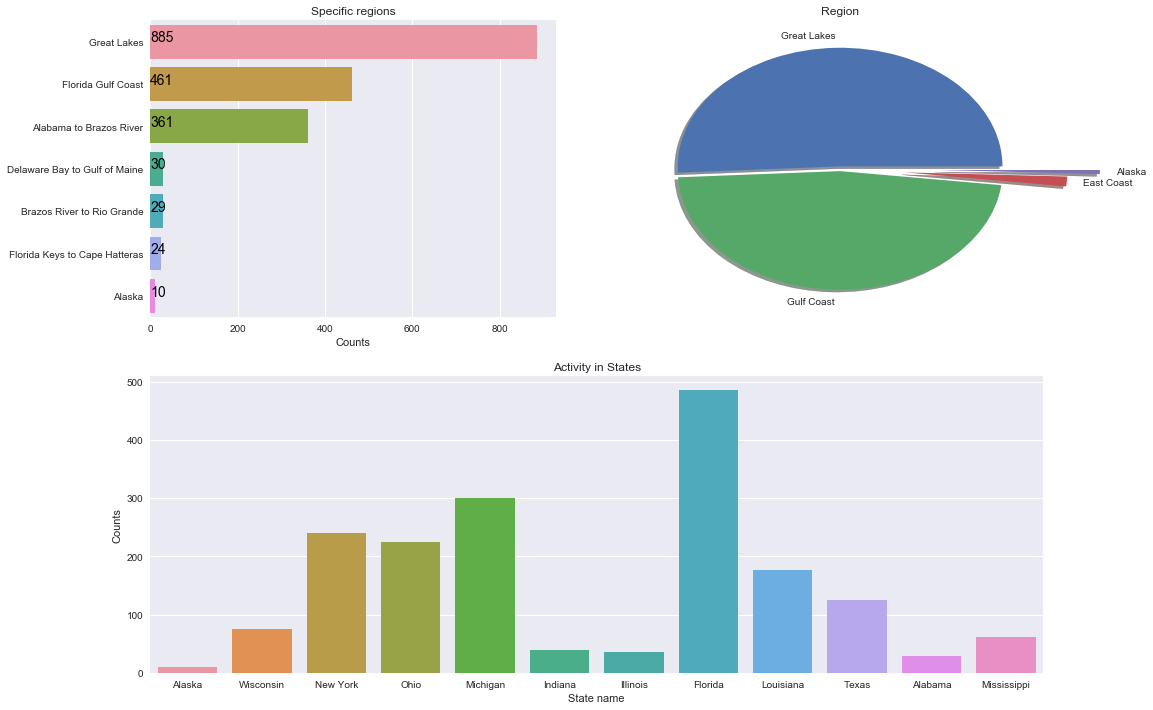

In [104]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

### specific_region
pretty_bar(histopaths.specific_region.value_counts(), ax1,
           xlabel="Counts", title="Specific regions")

### region
explode = [0.02, 0.02, 0.4, 0.6]
(histopaths.region
 .value_counts()
 .plot(kind="pie", ax=ax2, explode=explode, shadow=True)
 .set(ylabel="", title="Region"))

### state_name
(sns.countplot(histopaths.state_name, ax=ax3)
    .set(title="Activity in States", xlabel="State name", ylabel="Counts"));

<a id="hist_nst_site"></a>

### [^](#toc) Map of sites

Shown are all the NST Sites.  The dataset defines these as: "a character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location."

In [80]:
# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in histopaths[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

<a id="hist_gonadal"></a>

### [^](#toc) Gonadal

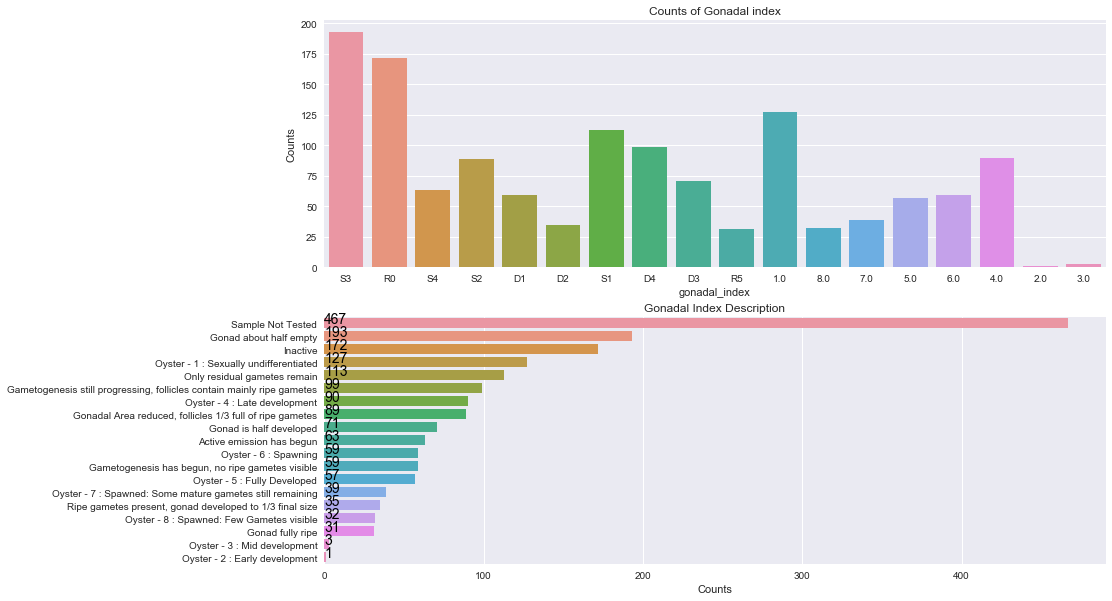

In [84]:
fig, axarr = plt.subplots(2, 1, figsize=(14, 10))

### dermo
(sns.countplot(histopaths.gonadal_index, ax=axarr[0])
     .set(title="Counts of Gonadal index", ylabel="Counts"))

### dermo_description
pretty_bar(histopaths.gonadal_index_description.value_counts(), axarr[1],
           title="Gonadal Index Description", xlabel="Counts")

<a id="hist_dermo"></a>

### [^](#toc) Dermo

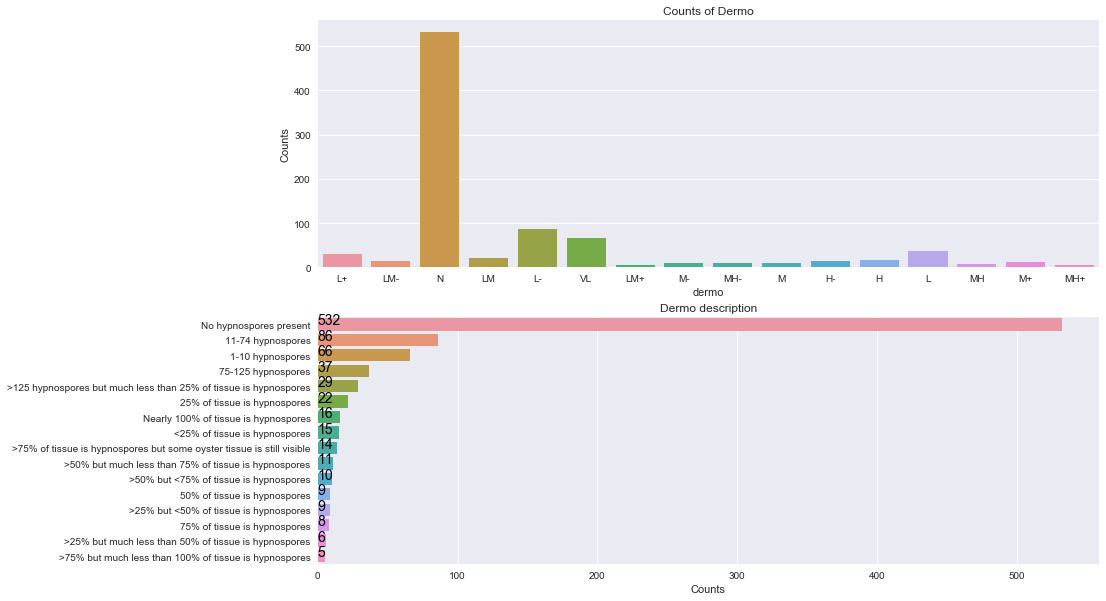

In [80]:
fig, axarr = plt.subplots(2, 1, figsize=(14, 10))

### dermo
(sns.countplot(histopaths.dermo, ax=axarr[0])
     .set(title="Counts of Dermo", ylabel="Counts"))

### dermo_description
pretty_bar(histopaths.dermo_description.value_counts(), axarr[1],
           title="Dermo description", xlabel="Counts")

### condition_code_description

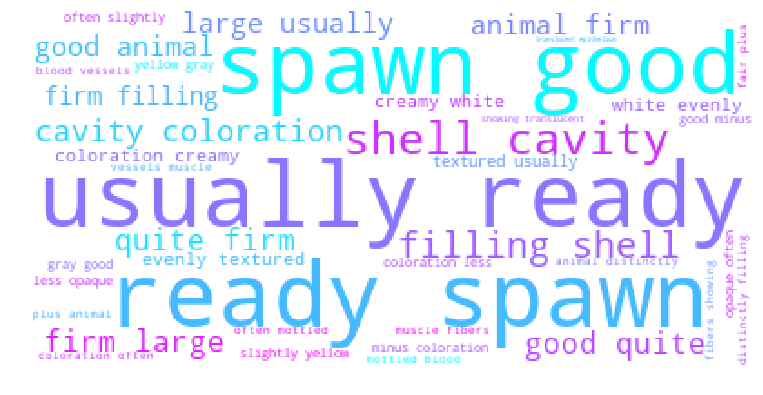

In [49]:
histopaths['condition_code_description'].fillna("", inplace=True)
text = " ".join(histopaths['condition_code_description']).lower()
# for w in ['need', 'student', 'classroom']: # remove some additional noise 
#     text = text.replace(w, " ")
wc = WordCloud(max_words=1200,
               colormap='cool', background_color='White').generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('');

### digestive_tubule_atrophy_description

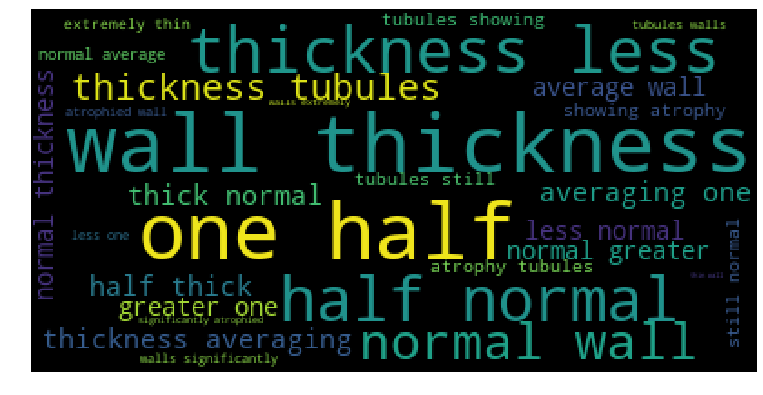

In [51]:
histopaths['digestive_tubule_atrophy_description'].fillna("", inplace=True)
text = " ".join(histopaths['digestive_tubule_atrophy_description']).lower()

wc = WordCloud(max_words=1200).generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('');

### Bit boring

trematode_metacercariae_description

<a id="hist_corr"></a>

### [^](#toc) Correlation plot

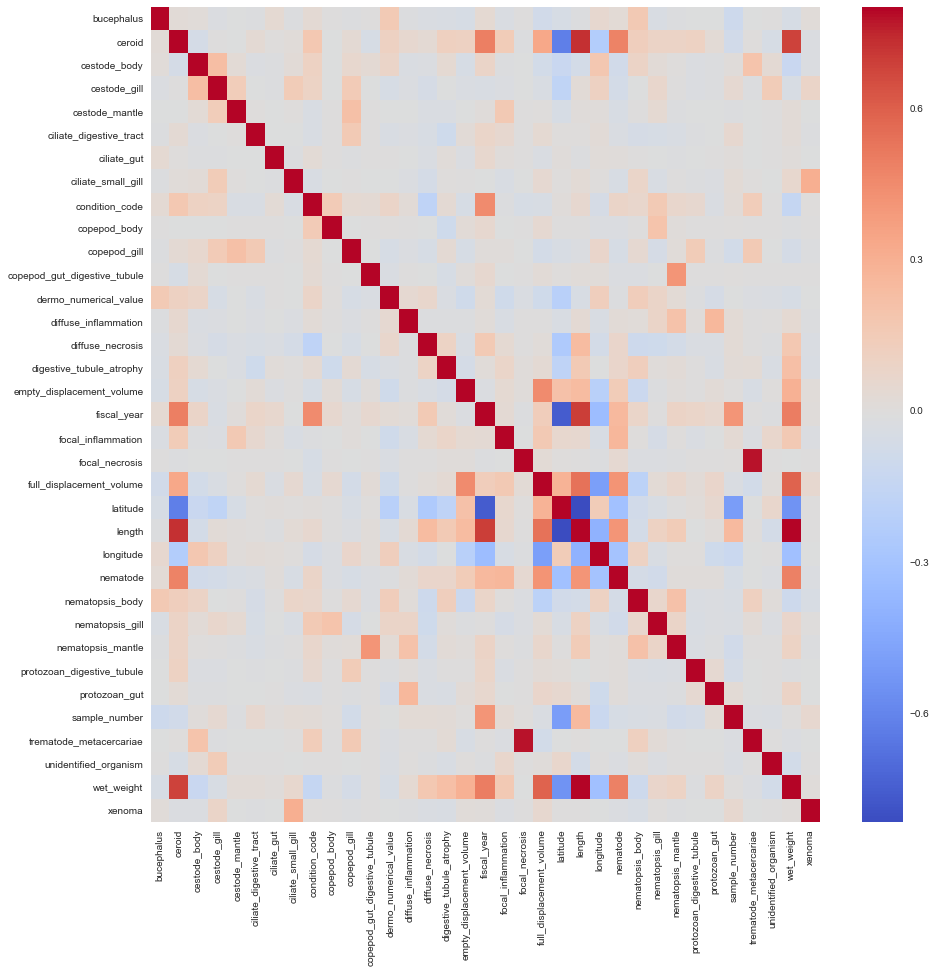

In [36]:
f, ax = plt.subplots(figsize=(15, 15))

_ = sns.heatmap(histopaths.corr(), vmax=.8, cmap="coolwarm")

### Numerical columns

bucephalus --- ceroid --- cestode_body --- cestode_gill --- cestode_mantle --- ciliate_digestive_tract --- ciliate_gut --- ciliate_small_gill --- condition_code --- copepod_body --- copepod_gill --- copepod_gut_digestive_tubule --- dermo_numerical_value --- digestive_tubule_atrophy --- nematode --- nematopsis_body --- nematopsis_gill --- nematopsis_mantle --- protozoan_digestive_tubule --- protozoan_gut --- trematode_metacercariae ---  xenoma

### Volume

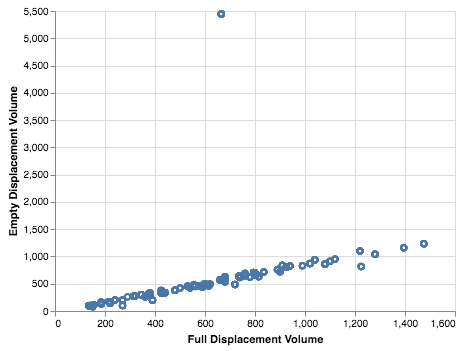

In [166]:
temp = histopaths[["full_displacement_volume", "empty_displacement_volume"]]
temp.columns = ["Full Displacement Volume", "Empty Displacement Volume"]

chart = alt.Chart(temp).mark_point().encode(
    x='Full Displacement Volume',
    y='Empty Displacement Volume',
)

chart

<a id="hist_size"></a>

### [^](#toc) Size

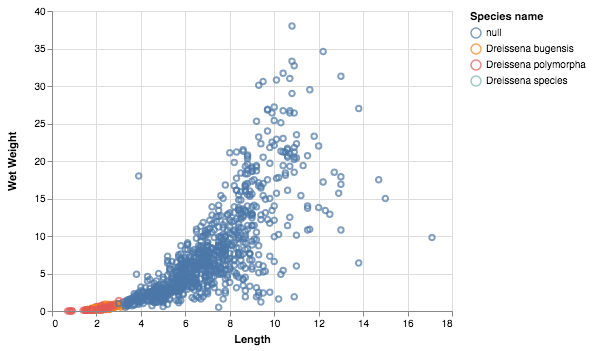

In [162]:
temp = histopaths[["length", "wet_weight", "species_name"]]
temp.columns = ["Length", "Wet Weight", "Species name"]

chart = alt.Chart(temp).mark_point().encode(
    x='Length',
    y='Wet Weight',
    color="Species name"
)

chart

### Study information

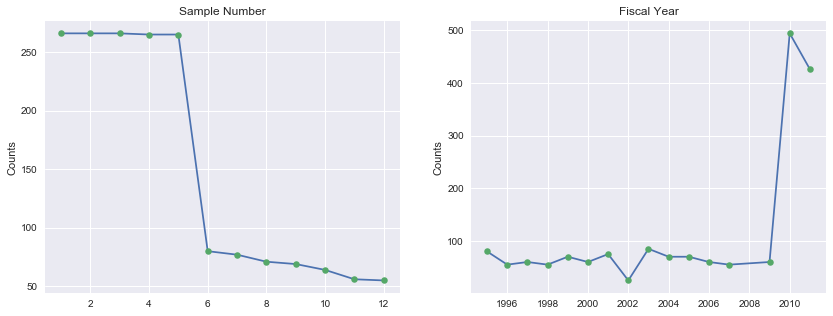

In [122]:
fig, axarr = plt.subplots(1, 2, figsize=(14, 5))

axarr[0].plot(histopaths.sample_number.value_counts().sort_index())
axarr[0].plot(histopaths.sample_number.value_counts().sort_index(), ".", markersize=13)
axarr[0].set_title("Sample Number")
axarr[0].set_ylabel("Counts")
axarr[1].plot(histopaths.fiscal_year.value_counts().sort_index())
axarr[1].plot(histopaths.fiscal_year.value_counts().sort_index(), ".", markersize=13)
axarr[1].set_title("Fiscal Year")
axarr[1].set_ylabel("Counts");

In [ ]:
focal_necrosis, diffuse_necrosis, focal_inflammation, diffuse_inflammation